# Laboratorio 2: Preprocesamiento y descripción de corpora.


### Cuerpo Docente

- Profesores: [Andrés Abeliuk](https://aabeliuk.github.io/), [Felipe Villena](https://fabianvillena.cl/).
- Profesor Auxiliar: [Gabriel Iturra](https://giturra.cl/)

## Preguntas ##

Leer atentamente las instrucciones entregadas a continuación para facilitar el proceso de revisión de sus trabajos.


` `

**Instrucciones:**



- Escribe tu código entre las lineas de comentarios **### Aquí inicia tu código ###** y **### Aquí termina tu código ###**.
- Cuando el ejercicio incluya un bloque llamado ***Test***, comprueba que el resultado de la ejecución coincida con el resultado esperado.
- Recuerde siempre mantener buenas prácticas de código.
- Está permitido sólo utilizar las librerías importadas antes del Ejercicio 1.
- **Recordar** que: *Documento = Oración. Dataset = Corpus. Vocabulario = Tokens*.
- El **orden de los resultados** pueden variar dependiendo de su máquina, pero los valores de los resultados son los mismos.



**Ejemplo:** Implemente una función **`hello_world()`** que imprima en pantalla `"Hello World"`.

In [1]:
def hello_world():
  ### Aquí inicia tu código ###
  print("Hello World")
  ### Aquí termina tu código ###

***Test:***

In [2]:
hello_world()

Hello World


***Resultado esperado***:
<table>
    <tr>
        <td> Hello World </td>
    </tr>
</table>

``
``




Estas son las librerías permitidas. Si quieren utilizar alguna librería adicional, pueden realizar la consulta a través de Discord.

In [3]:
import codecs
import re
import numpy as np
import pandas as pd

En caso de desarrollar la tarea desde colab, utilizar el siguiente código para cargar los archivos desde el drive:

In [ ]:
try:
    from google.colab import drive

    drive.mount("/content/drive")
    path = 'path/to/marcianeke.txt'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


O puede subirlo a google colab usando este código, sin interactuar con Google Drive, pero debe resubir el archivo cada que vuelve a entrar a este google colab.

In [4]:
from google.colab import files

file = files.upload()

Saving marcianeke.txt to marcianeke.txt


` `

**Ejercicio 1 - normalizador**  
` `  
` `

En el primer ejercicio veremos la dificultad 😨 de normamilzar textos no estructurados, destacando la importancia de tener librerías que realicen este trabajo.

El archivo adjunto al enunciado de la tarea contiene la letra de una canción del marcianeke 👽. Utilice este texto para realizar su primera tokenización y ver qué tan bien funciona su función.

Ejecute el código a continuación para cargar el ejemplo. Recuerde realizar la modificación al directorio en caso que el archivo no se encuentre en el mismo directorio del Jupyter Notebook.

In [5]:
text = codecs.open('marcianeke.txt', 'r', 'UTF-8').read()
print(text)

Brr
Marcianeke
Vamo' a estar con Pailita
Dimelo má
Ando en busca de una criminal (ah, ah)
Esa que el gatillo le gusta jalar (rata-ta)
Que le guste flotar y fumar (brr)
Tussi, keta quiere' mezclar
Dimelo má

Ando en busca de una criminal (ah, ah)
Esa que el gatillo le gusta jalar (rata-ta)
Que le guste flotar y fumar
Tussi, keta pura quiere' mezclar
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má

Esperame que ahora entro yo
Y lo que pide yo lo traje
No visto de traje
Puro corte calle, no de maquillaje
Pronto coronamos y nos vamo' de viaje
Tanto hit que hago que lo' culo bajen
Ella se va de shopping
Sale positivo si se hace el doping
Baila twerk con un poco de popping
Los fardos en el botín

Si quieren letra llamen pa' mi booking
Generando, sigo en la mía lowkey
Cooking en el estudio con tu woman
Tanto whisky, pisco que hasta lo' vecinos toman
Si se tiran pa' aca puede que la arena coman
Ja, en el chanteo titulado sin diploma
Di-dimelo má
Di-di

Implemente la funcion **```normalize()```**, que normalize una cadena de texto convirtiéndo todo a minúsculas, quitando los caracteres no alfabéticos y los tildes. Note que la función tiene una variable nombrada ```remove_tildes```, que determina si hay que eliminar los tildes o no, considere dicha opción en su implementación. Luego, aplique esta función a cada una de las línea de la canción de marcianke 👽.
    

In [6]:
import re
def remove_accents(text):
    replacements = {
        "ä": "a",
        "ö": "o",
        "ü": "u",
        "Ä": "A",
        "Ö": "O",
        "Ü": "U",
        "á": "a",
        "é": "e",
        "í": "i",
        "ó": "o",
        "ú": "u",
        "Á": "A",
        "É": "E",
        "Í": "I",
        "Ó": "O",
        "Ú": "U"
    }

    for accented, non_accented in replacements.items():
        text = text.replace(accented, non_accented)

    return text

def normalize(text, rt):
  text = re.sub(r'[A-Z]', lambda match: match.group(0).lower(), text)
  if rt:
    text = remove_accents(text)
  text = re.sub(r'[^a-zA-Z ]', '', text)
  return text



rtildes = True
lines = text.splitlines()
cleaned_lines = []

for line in lines:
    cleaned_line = normalize(line, rtildes)
    cleaned_lines.append(cleaned_line)
cleaned_text = '\n'.join(cleaned_lines)
print(cleaned_text)


brr
marcianeke
vamo a estar con pailita
dimelo ma
ando en busca de una criminal ah ah
esa que el gatillo le gusta jalar ratata
que le guste flotar y fumar brr
tussi keta quiere mezclar
dimelo ma

ando en busca de una criminal ah ah
esa que el gatillo le gusta jalar ratata
que le guste flotar y fumar
tussi keta pura quiere mezclar
didimelo ma
didimelo ma
didimelo ma
didimelo ma
didimelo ma
didimelo ma
didimelo ma

esperame que ahora entro yo
y lo que pide yo lo traje
no visto de traje
puro corte calle no de maquillaje
pronto coronamos y nos vamo de viaje
tanto hit que hago que lo culo bajen
ella se va de shopping
sale positivo si se hace el doping
baila twerk con un poco de popping
los fardos en el botin

si quieren letra llamen pa mi booking
generando sigo en la mia lowkey
cooking en el estudio con tu woman
tanto whisky pisco que hasta lo vecinos toman
si se tiran pa aca puede que la arena coman
ja en el chanteo titulado sin diploma
didimelo ma
didimelo ma
didimelo ma
didimelo ma
didim

Implementen una función **`get_tokens()`** que reciba un texto y entregue una lista con sus tokens. Son libres de elegir la forma de tokenizar mientras no utilicen librerías con tokenizadores ya implementados. Pueden utilizar la librería **re** importada para trabajar símbolos. Esta función debe aplicar en el texto normalizado de la pregunta anterior.


Ejemplo de uso:

`get_tokens('Este es un ejemplo de prueba.')`

Nos entregaría:

`['Este', 'es', 'un', 'ejemplo', 'de', 'prueba', '.']`

In [ ]:
def get_tokens(text):
  return text.split()

get_tokens(text)

In [ ]:
tokens = get_tokens(text)
tokens

In [ ]:
print(text)

**Describa cuáles fueron sus supuestos para realizar la tokenización y compare sus tokens con los entregados por la librería nltk en el bloque de código de más abajo.**

Supuestos aqui


In [ ]:
from nltk.tokenize import wordpunct_tokenize
nltk_tokens = wordpunct_tokenize(text)
nltk_tokens

` `  
` `

**Ejercicio 3 - Stopwords y Stemming**
` `  
` `

Considere el siguiente corpus:


In [9]:
dataset = ["I like human languages", "I like programming languages", "Spanish is my favorite language"]

Diseñe una función **`get_vocab()`** que extraiga los tokens de este corpus solamente tokenizando. Puede utilizar la función del Ejercicio 1.

In [10]:
def get_vocab(dataset):
  text = ""
  t = ""
  for elementos in dataset:
    text = elementos.split()
    for i in range(len(text)):
      t = t + " " + text[i]
    k = t.split()
  return list(set(k))


nltk_tokens = get_vocab(dataset)
nltk_tokens

['language',
 'favorite',
 'languages',
 'like',
 'is',
 'I',
 'my',
 'programming',
 'human',
 'Spanish']

***Test:***

In [11]:
vocab = get_vocab(dataset)
vocab

['language',
 'favorite',
 'languages',
 'like',
 'is',
 'I',
 'my',
 'programming',
 'human',
 'Spanish']

``
``

***Resultado esperado***:
<table>
    <tr>
        <td>['favorite',
 'Spanish',
 'language',
 'I',
 'like',
 'programming',
 'languages',
 'my',
 'human',
 'is'] </td>
    </tr>
</table>

``
``

Ahora diseñe reglas que usted estime convenientes tanto de **Stemming** como de **Stopwords**. Implemente una función que reciba una lista con los elementos del vocabulario, le aplique sus reglas y devuelva el vocabulario actualizado.

    Explique sus reglas aquí:


In [20]:
def pre_processing_PorterStemmer(vocab):
  stemmer = PorterStemmer()
  stemmed_texto = []
  for cadaPalabra in vocab:
    stemmed_word = stemmer.stem(cadaPalabra)
    stemmed_texto.append(stemmed_word)
  return stemmed_texto

In [35]:
def pre_processing_SnowballStemmer(vocab):
  stemmer = SnowballStemmer(language="english")
  stemmed_texto = []
  for cadaPalabra in vocab:
    stemmed_word = stemmer.stem(cadaPalabra)
    stemmed_texto.append(stemmed_word)
  return stemmed_texto

In [49]:
# StopWords

def pre_processing_stopWords(vocab):
  stop_words = stopwords.words('english')
  print(stop_words) # solo para examinar los que está predefinido como stopwords
  textoSinStopWords = []
  for cadapalabra in vocab:
    if cadapalabra not in stop_words:
      textoSinStopWords.append(cadapalabra)
  return textoSinStopWords

In [50]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
vocabulario = vocab
vocabulario_SinStopWords = pre_processing_stopWords(vocabulario)
vocab = pre_processing_PorterStemmer(vocabulario_SinStopWords)
print(vocab)
vocab = pre_processing_SnowballStemmer(vocabulario_SinStopWords)
print(vocab)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


` `  
` `

**Ejercicio 4 - WorldCloud**
` `  
` `

Seleccione un corpus de texto de la librería **`nltk`**, y cree un word cloud de las principales palabras. Para esto corra la siguiente línea y elija un corpus.

Corpus incluidos en la librería:
['AlignedCorpusReader', 'AlpinoCorpusReader', 'BCP47CorpusReader', 'BNCCorpusReader', 'BracketParseCorpusReader', 'CHILDESCorpusReader', 'CMUDictCorpusReader', 'CategorizedBracketParseCorpusReader', 'CategorizedCorpusReader', 'CategorizedPlaintextCorpusReader', 'CategorizedSentencesCorpusReader', 'CategorizedTaggedCorpusReader', 'ChasenCorpusReader', 'ChunkedCorpusReader', 'ComparativeSentencesCorpusReader', 'ConllChunkCorpusReader', 'ConllCorpusReader', 'CorpusReader', 'CrubadanCorpusReader', 'DependencyCorpusReader', 'EuroparlCorpusReader', 'FramenetCorpusReader', 'IEERCorpusReader', 'IPIPANCorpusReader', 'IndianCorpusReader', 'KNBCorpusReader', 'LazyCorpusLoader', 'LinThesaurusCorpusReader', 'MTECorpusReader', 'MWAPPDBCorpusReader', 'MacMorphoCorpusReader', 'NKJPCorpusReader', 'NPSChatCorpusReader', 'NombankCorpusReader', 'NonbreakingPrefixesCorpusReader', 'OpinionLexiconCorpusReader', 'PPAttachmentCorpusReader', 'PanLexLiteCorpusReader', 'PanlexSwad

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


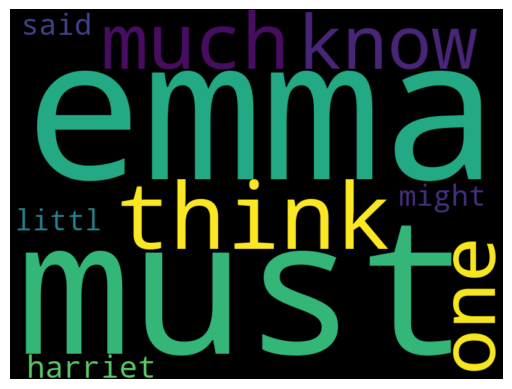

In [75]:
import nltk
from nltk.corpus import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
listaDeCorpus = dir(nltk.corpus)
# Solo para saber
print("Corpus incluidos en la librería:")
print(listaDeCorpus)

nltk.download('gutenberg')
corpus = gutenberg.raw("austen-emma.txt")

# Vamos a tokenizar de manera muy simple
corpus = corpus.split()
#Aplicaremos StopWords
corpus = pre_processing_stopWords(corpus)
# Aplicaremos stemming
corpus = pre_processing_PorterStemmer(corpus)


print(nltk.corpus.gutenberg.fileids())

wordcloud = WordCloud(width=800, height=600, max_words=10, background_color='black')
wordcloud.generate(' '.join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


De acuerdo, a los resultados obtenidos, considera que el WorldCloud refleja el contenido principal del que habla un documento, si es así ¿Porqué?

**Respuesta:**


` `  
` `

**Ejercicio 5 - Corpus Statistics**
` `  
` `

Utilizando el corpus anterior, realice algunas estadísticas sobre los principales tokens del corpus, para esto:

* Realice un gráfico de dispersión de algunas palabras claves que pudo observar en el WordCloud.
* Realice un grafico de conteo de palabras sobre el corpus.
* Realice un grafico de conteo de palabras sobre el corpus, eliminando el stopwords.

In [ ]:
corpus

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


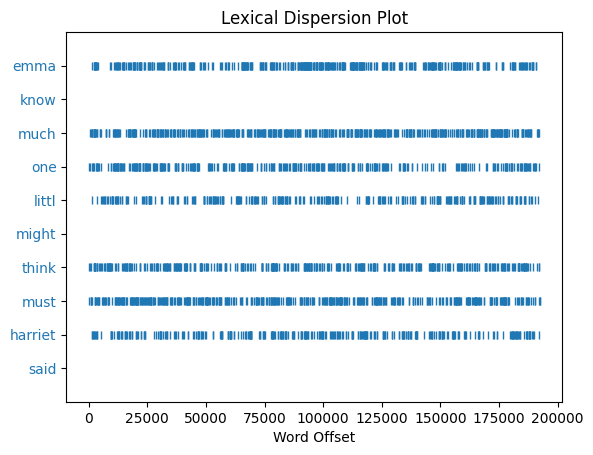

In [98]:
import nltk
nltk.download('genesis')
nltk.download("inaugural")
nltk.download("nps_chat")
nltk.download("webtext")
#from nltk.book import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
palabras = ["said", "harriet", "must","think","might","littl", "one", "much", "know", "emma"]
top_10_words = wordcloud.words_
texto = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
texto.dispersion_plot(palabras)



Luego, responda la siguientes preguntas:

* ¿Las palabras reflejas en el corpus, son las mismas reflejas en los gráficos de conteo?
# No...faltó el conteo de Know, might y said
* ¿Que sucede al eliminar las stopwords cambia algo, entre lo reflejado entre el WordCloud y lo mostrado en los gráficos?
# No vi cambios. Pero no fui muy exhaustivo
* En base a estos resultados, ¿Cree que es necesario eliminar stopwords? ¿Porqué no? o ¿Porque si?
# Creo que siempre es necesario probar los resultados con y sin stopWords. Creo que depende del contexto de lo que se quiere resolver

![gato](https://live.staticflickr.com/4652/38904147065_0b6c446945_b.jpg)

**Cualquier recomendación que nos quisieran dar para una futura tarea es bienvenid@!**


# Excelente ejercicio...gracias